# SUPERVISED MACHINE LEARNING ALGORITHMS

In [1]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

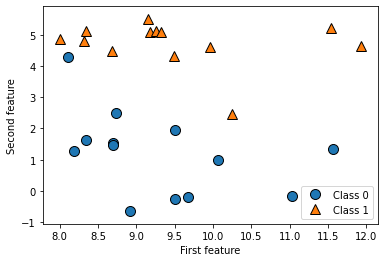

X.shape: (26, 2)


In [2]:
#sample dataset for classification - synthetic dataset
#generate dataset 
X, y = mglearn.datasets.make_forge()
#plot data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc = 4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()
print('X.shape:', X.shape)

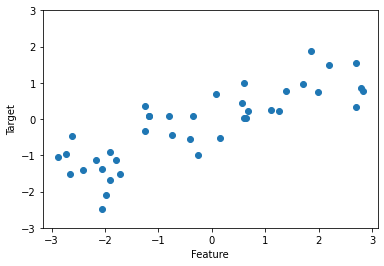

In [3]:
#Sample dataset for regression - synthetic dataset
X,y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [4]:
#Breast Cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys():\n', cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print('Shape of cancer data:', cancer['data'].shape)
print('{} rows and {} columns'.format(cancer['data'].shape[0], cancer['data'].shape[1]))

Shape of cancer data: (569, 30)
569 rows and 30 columns


In [6]:
#Sample per class
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [7]:
print('Feature names:\n', cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()
print('Data shape:', boston.data.shape)

Data shape: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape:', X.shape)

X.shape: (506, 104)


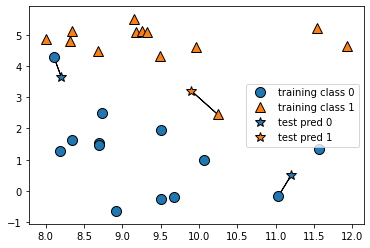

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

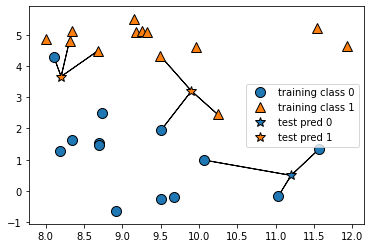

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train, y_train)
print('Test set predictions:', clf.predict(X_test))

print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


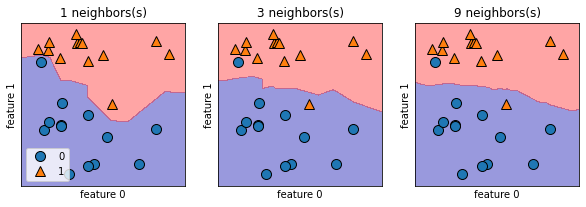

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title('{} neighbors(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc = 3)
    

Decision boundaries created by the nearest neighbors model for different values of n_neighbors

In [15]:
from sklearn.datasets import load_breast_cancer

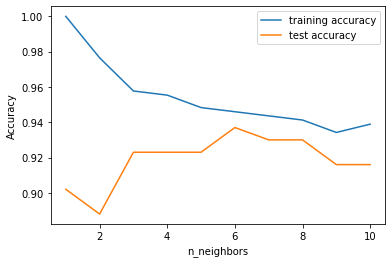

In [16]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, 
                                                    random_state = 66)

training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

K-Neighbors Regression

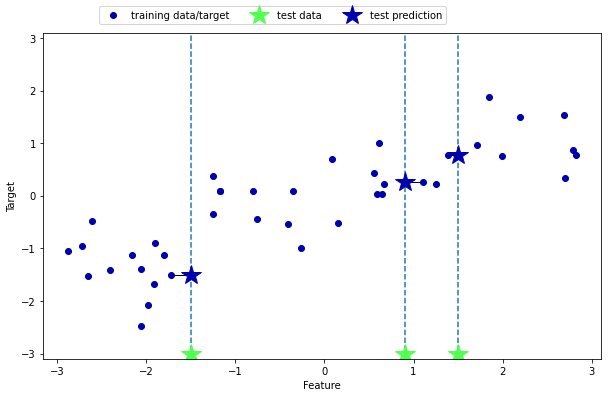

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

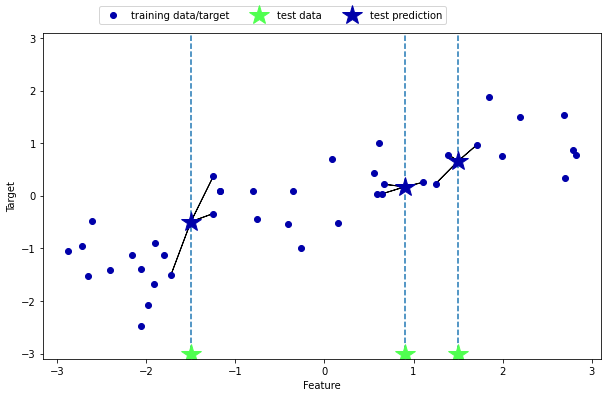

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

K-nearest neighbors algorithm for regression is implemented in the KNeighbors Regressor class in scikit-learn. It's used similarly to KNeighborsClassifier:

In [19]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

#Split the wave dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors = 3)

#Fit the model using the training data and training targets
reg.fit(X_train, y_train)

#Making predictions on the test set:
print('Test set predictions:\n', reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [20]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Analyzing KNeighborsRegressor

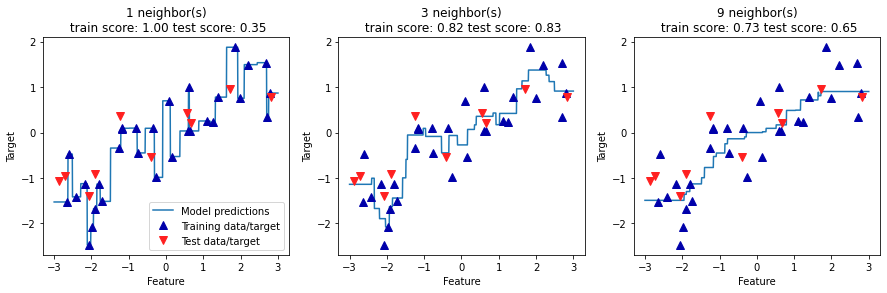

In [21]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
#create 1000 data points, evenly spaced -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    #make predictions using 1,3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
        '{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), 
                                                                        reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc = 'best')

Linear Models

w[0]: 0.393906  b: -0.031804


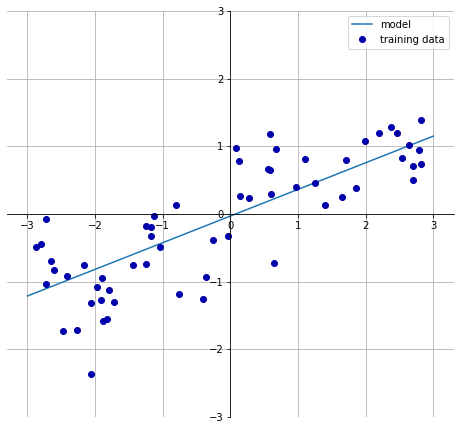

In [22]:
mglearn.plots.plot_linear_regression_wave()

#### Linear Models
Linear regression or Ordinary Least Squares: simplest and classic linear method for regression. Linear regression finds parameters `w`and `b` that minimize the `mean squared error`s between the predictions and the true regression targets, y, on the training set. The `mean squared error` is the sum of the squared differences between the predictions and the true values, divided by the number of samples.

In [23]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

- `w` = `slope parameters` or `weights` or `coefficients` are stored in the `coef_` atrribute.
- `b` = `offset` or `intercept` stored in the `intercept_` attribute

In [24]:
print('lr.coef_:', lr.coef_)
print('lr_intercept_:', lr.intercept_)

lr.coef_: [0.39390555]
lr_intercept_: -0.031804343026759746


In [25]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An R^2 value of 0.66 is not very good, but we can see that the scores on the training and test sets are very close together this means there is a likely case of underfitting here not overfitting. There is little chance of overfitting since the dataset is one-dimensional. With higher-dimensional datasets Linear Models becomes more powerful and the chances of overfitting are increased.

Linear Regression with higher dimension data 'Boston Housing Data' - 506 samples and 104 derived features.

In [26]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [27]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Model performing well on training set and badly on test set, is a clear sign of overfitting. We should use a model that allows us to control complexity. One example is the Ridge Regression.

Ridge Regression

Ridge regression is also a Linear Model for regression, has the same formula as the one used for Ordinary Least Squares. In ridge regression the coefficients (w) are not only chosen so that they predict well on the training data, but also to fit an additional constraint. Also, we want the magnitude of coefficients to be as small as possible i.e all entries of w should be close to zero. Meaning each feature should have as little effect on the outcomes as possible (which translates to having a small slope), while predicting well. This constraint is called `Regularization`. Regularization means explicitly restricting a model to avoid overfitting. Ridge regression uses `L2 Regulariztion`.

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


It is better to choose Ridge regression over Linear Regression as the there is an increase in the test score. Ridge model makes a trade-off between the simplicity of the model (near zero coefficients) and it's performance on training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. Increasing alpha forces cofficients to move more toward zero, which decreases training set performance but might help generalization.